# Random Forest Classifier for Ultimate UFC Dataset
The Ultimate UFC Dataset from Kaggle is being used since my manually scraped data provided no change in performance


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
pd.set_option('display.max_columns', None)

data = pd.read_csv("ufc-master.csv").reset_index(drop=True)

bettingCols = ["RedOdds", "BlueOdds", "RedExpectedValue", "BlueExpectedValue" "RedDecOdds",	"BlueDecOdds", "RSubOdds", "BSubOdds", "RKOOdds", "BKOOdds"]
fightDetailCols = ["Date","Location","Country","TitleBout","WeightClass","Gender","RedFighter","BlueFighter","BetterRank", "FinishRoundTime"]


excluded_na_drop = ["FinishDetails"]
#data = data.drop(columns=[col for col in data.columns if col in bettingCols]) # set to excluded_na_drop

label_encoder_winner = LabelEncoder()
label_encoder_stance = LabelEncoder()
label_encoder_finish_method = LabelEncoder()
label_encoder_finish_details = LabelEncoder()

data['RedStance'] = label_encoder_stance.fit_transform(data['RedStance'])
data['BlueStance'] = label_encoder_stance.fit_transform(data['BlueStance'])
data['Finish'] = label_encoder_finish_method.fit_transform(data['Finish'])
data['FinishDetails'] = label_encoder_finish_details.fit_transform(data['FinishDetails'])


y = data[["Winner"]]
data = data.drop(columns=fightDetailCols)
X = data.drop(columns=["Winner"])
y = y.loc[X.index]
data['Winner'] = label_encoder_winner.fit_transform(data['Winner'])


print(data.shape)



(6441, 41)


## Classification 

In [5]:
# Train/test split for final evaluation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

# Model setup
model = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=20, min_samples_leaf=10, random_state=42, class_weight="balanced")


# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Train the model
model.fit(X_train, y_train)

# Predictions
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Scores
train_acc = accuracy_score(y_train, train_preds)
val_acc = accuracy_score(y_val, val_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Classification reports
print("Validation Set Performance:")
print(classification_report(y_val, val_preds))

print("Test Set Performance:")
print(classification_report(y_test, test_preds))
# Cross-validation results
print(f"\nCross-validation mean accuracy: {cv_scores.mean():.4f}")
print(f"Cross-validation standard deviation: {cv_scores.std():.4f}")

Train Accuracy: 0.7447
Validation Accuracy: 0.6584
Test Accuracy: 0.6443

Validation Set Performance:
              precision    recall  f1-score   support

        Blue       0.60      0.68      0.64       424
         Red       0.72      0.64      0.68       542

    accuracy                           0.66       966
   macro avg       0.66      0.66      0.66       966
weighted avg       0.67      0.66      0.66       966

Test Set Performance:
              precision    recall  f1-score   support

        Blue       0.58      0.65      0.61       416
         Red       0.71      0.64      0.67       551

    accuracy                           0.64       967
   macro avg       0.64      0.64      0.64       967
weighted avg       0.65      0.64      0.65       967


Cross-validation mean accuracy: 0.6502
Cross-validation standard deviation: 0.0133


## Plotting Correlations

Top 10 Strongest Correlations:
BlueOdds               0.348866
RedOdds                0.341384
RedExpectedValue       0.322995
BlueExpectedValue      0.317951
BlueDecOdds            0.231676
BKOOdds                0.207125
RKOOdds                0.196173
BSubOdds               0.176900
RedDecOdds             0.171349
RSubOdds               0.159351
RedAge                 0.119582
AvgTDDif               0.108851
BlueAge                0.104658
RedAvgSigStrPct        0.084097
RedAvgTDLanded         0.080820
BlueAvgTDLanded        0.073645
RedAvgTDPct            0.065291
ReachDif               0.059291
BlueAvgSigStrPct       0.055925
AvgSubAttDif           0.055809
SigStrDif              0.052076
RedAvgSubAtt           0.045946
Finish                 0.040851
HeightDif              0.039485
AgeDif                 0.036090
BlueAvgTDPct           0.033984
BlueAvgSubAtt          0.030890
RedAvgSigStrLanded     0.028992
BlueAvgSigStrLanded    0.024446
RedStance              0.023970
BlueReach

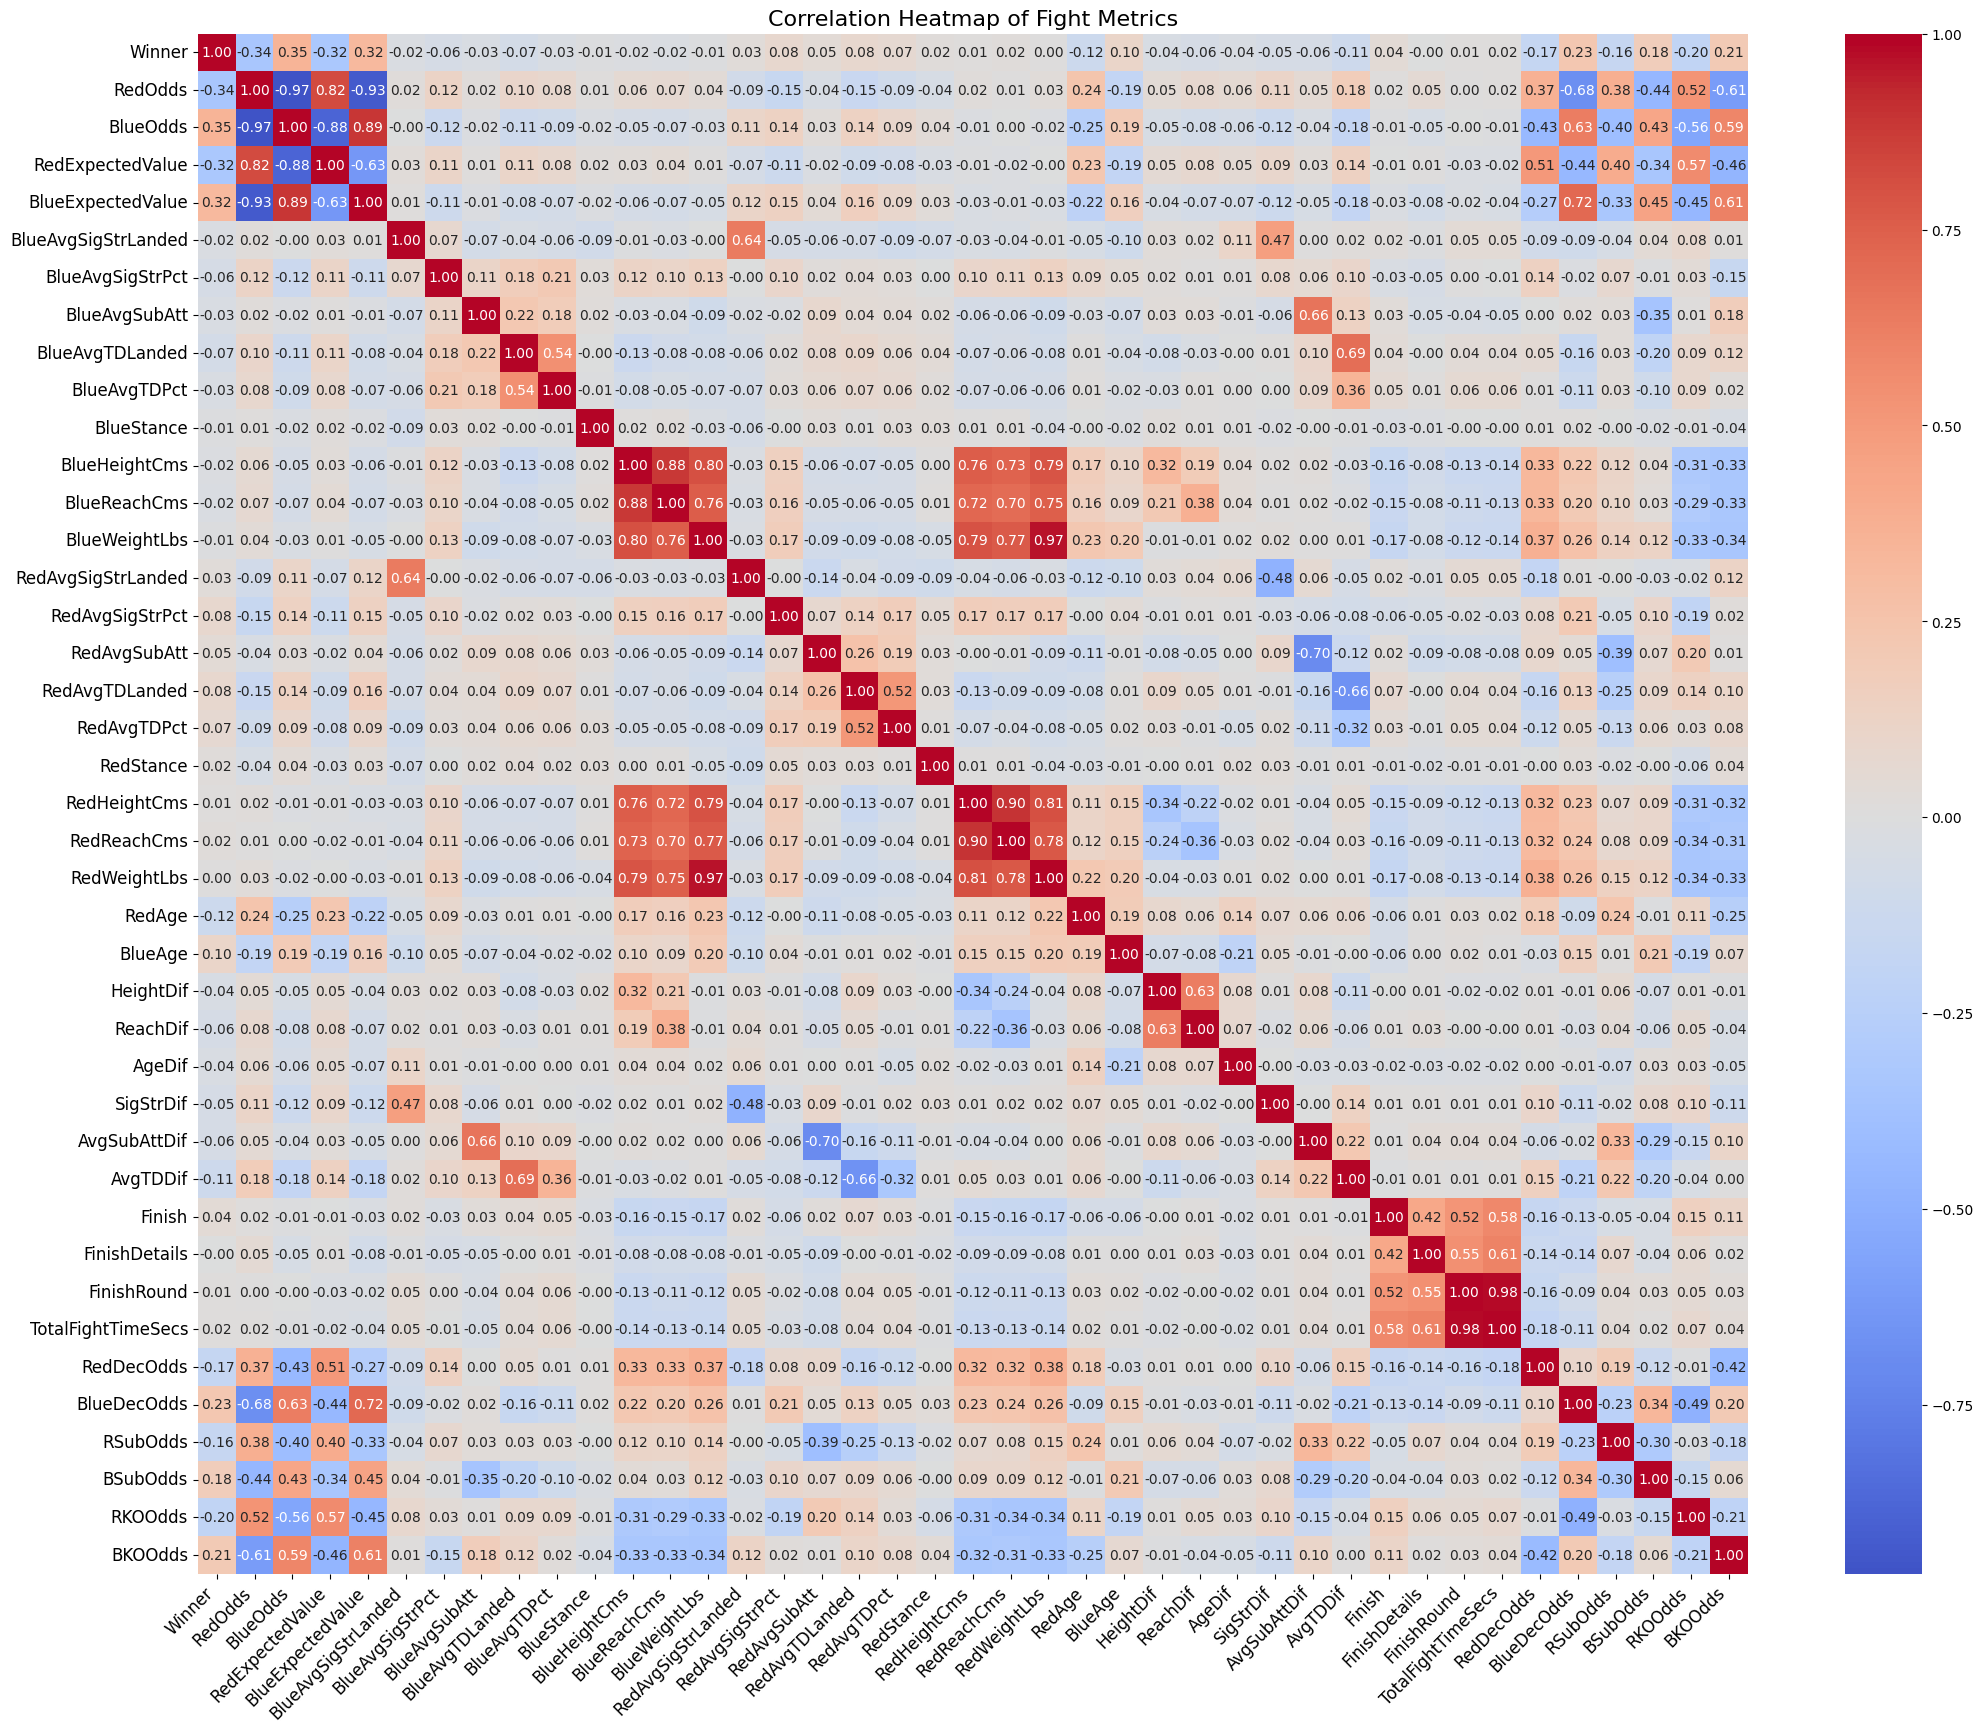

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = data.corr()

# Get correlations with "Winner" and sort them
winner_corr = correlation_matrix["Winner"].drop("Winner").abs().sort_values(ascending=False)

# Display strongest correlations
print("Top 10 Strongest Correlations:")
print(winner_corr)

# Increase figure size for heatmap
plt.figure(figsize=(25, 20))

# Create heatmap with better spacing
sns.heatmap(
    correlation_matrix, 
    annot=True,  
    fmt=".2f",  
    cmap="coolwarm",  
    center=0,  
    annot_kws={"size": 10}  
)

# Rotate labels for readability
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add title
plt.title("Correlation Heatmap of Fight Metrics", fontsize=16)

# Show plot
plt.show()
